# 📘 Regression

Regression is a supervised machine learning technique used to predict a continuous target variable based on input features. It estimates the relationships among variables and is widely used in fields such as economics, real estate, and health sciences

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")  

# Drop rows with missing values
df = df.dropna()

# One-hot encode the 'ocean_proximity' column
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# Define features and target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Types of Regression

### 🔵Linear Regression

Linear Regression models the relationship between a dependent variable and one or more independent variables using a straight line. It's the simplest form of regression.

#### Use Cases:

Predicting house prices based on square footage

Forecasting sales based on advertisement spend

Estimating salary based on experience

Linear Regression
MSE: 4802173538.60
R² Score: 0.65


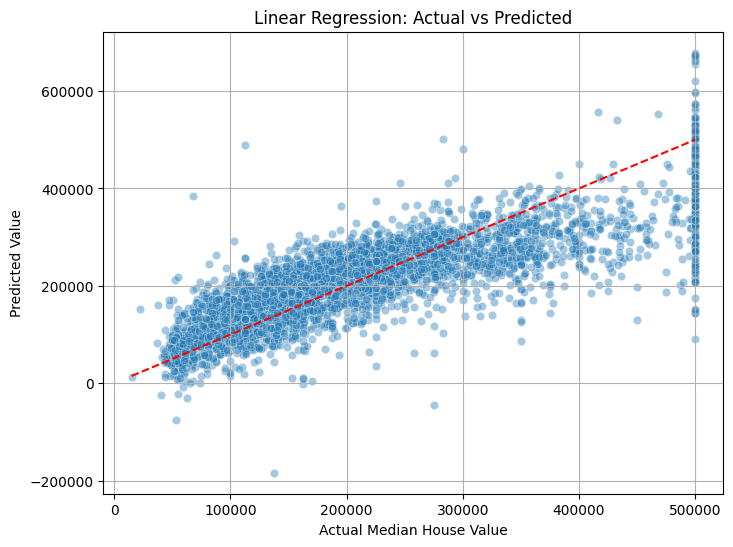

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
lr_preds = lr.predict(X_test_scaled)

# Evaluation Metrics
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print(f"Linear Regression")
print(f"MSE: {lr_mse:.2f}")
print(f"R² Score: {lr_r2:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

### 🟣 Polynomial Regression

Extends linear regression by fitting non-linear curves (quadratic, cubic etc.).
This is used when the relationship between the dependent and independent variables is non-linear.
Polynomial regression can model curvatures and more complex patterns by adding polynomial terms 

#### Use Cases:

Modeling non-linear growth (e.g. population over time)

Predicting house prices in high-end markets with more complex behavior

Physics problems with curved trajectories

Polynomial Regression with Ridge Regularization (Degree 2)
MSE: 3979157409.18
R² Score: 0.71


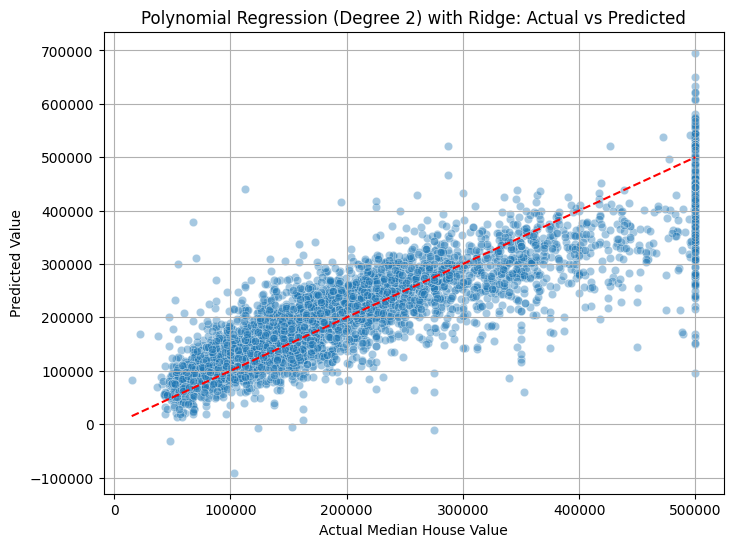

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Use Ridge regression (to avoid overfitting)
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge_model.fit(X_train_poly, y_train)

# Predict
ridge_preds = ridge_model.predict(X_test_poly)

# Evaluation
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

print("Polynomial Regression with Ridge Regularization (Degree 2)")
print(f"MSE: {ridge_mse:.2f}")
print(f"R² Score: {ridge_r2:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=ridge_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Polynomial Regression (Degree 2) with Ridge: Actual vs Predicted")
plt.grid(True)
plt.show()


### 🟢 Ridge Regression (L2)

Linear regression with L2 regularization to avoid overfitting ,  especially when you have a lot of features or high correlation between them.

#### Use Cases:

When dataset has many features or multicollinearity

Insurance pricing using many variables

Stock prediction using multiple indicators

Ridge Regression
MSE: 4802177688.91
R² Score: 0.65


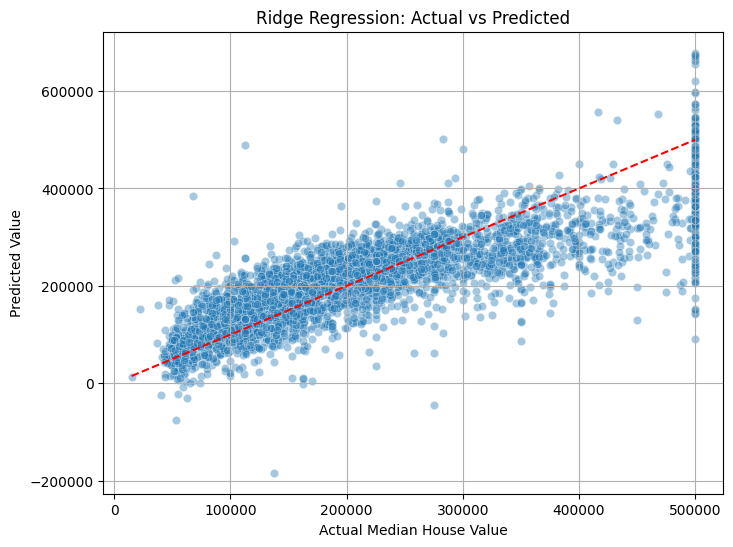

In [6]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict
ridge_preds = ridge.predict(X_test_scaled)

# Evaluation
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

print("Ridge Regression")
print(f"MSE: {ridge_mse:.2f}")
print(f"R² Score: {ridge_r2:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=ridge_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


### 🔴 Lasso Regression (L1)

Linear regression with L1 regularization — it can shrink some weights to zero (feature selection!) which makes the model simpler and more interpretable.

#### Use Cases:

High-dimensional data (e.g. genetics, sensors)

Feature selection in complex models

Sparse models in finance

Lasso Regression
MSE: 4802173817.75
R² Score: 0.65


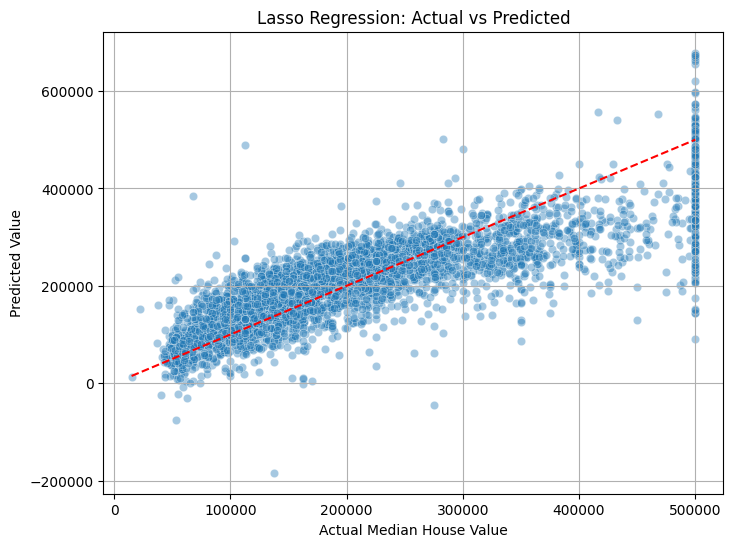

In [7]:
from sklearn.linear_model import Lasso

# Train Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict
lasso_preds = lasso.predict(X_test_scaled)

# Evaluation
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

print("Lasso Regression")
print(f"MSE: {lasso_mse:.2f}")
print(f"R² Score: {lasso_r2:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lasso_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Lasso Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


### 🟠 ElasticNet Regression

Combines both L1 (Lasso) and L2 (Ridge) regularization.

#### Use Cases:

When you want balance between feature selection & generalization

Economic modeling with hundreds of features

Text analysis with many correlated predictors

ElasticNet Regression
MSE: 4938727459.02
R² Score: 0.64


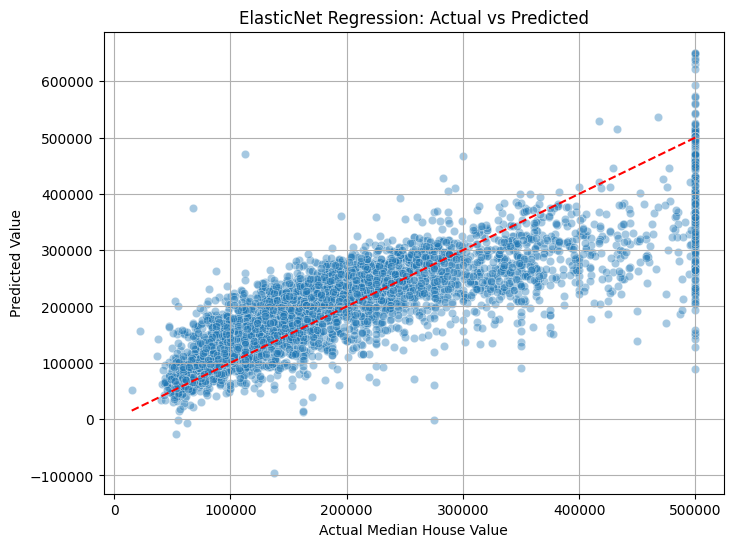

In [10]:
from sklearn.linear_model import ElasticNet

# Train ElasticNet model
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic.fit(X_train_scaled, y_train)

# Predict
elastic_preds = elastic.predict(X_test_scaled)

# Evaluation
elastic_mse = mean_squared_error(y_test, elastic_preds)
elastic_r2 = r2_score(y_test, elastic_preds)

print("ElasticNet Regression")
print(f"MSE: {elastic_mse:.2f}")
print(f"R² Score: {elastic_r2:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=elastic_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("ElasticNet Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


### 🌳 Decision Tree Regression

Splits data into regions using if-else logic, then predicts constant value in each leaf.
Decision Trees split the data into subsets based on feature values and predict the target by averaging the target values within each subset.
It works well when the data is non-linear, and interactions between features are important.
### Use Cases:

Predicting loan risk

Understanding non-linear patterns

Explaining student performance based on multiple attributes

Decision Tree Regression
MSE: 5089544884.89
R² Score: 0.63


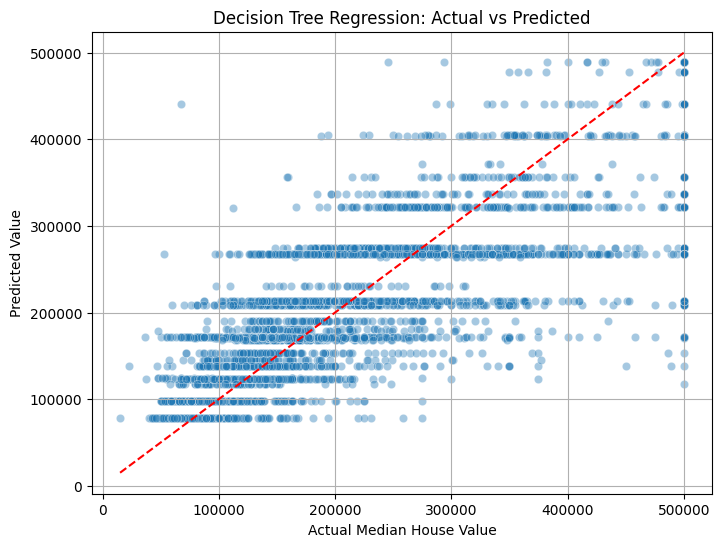

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42, max_depth=5)
tree.fit(X_train_scaled, y_train)

# Predict
tree_preds = tree.predict(X_test_scaled)

# Evaluation
tree_mse = mean_squared_error(y_test, tree_preds)
tree_r2 = r2_score(y_test, tree_preds)

print("Decision Tree Regression")
print(f"MSE: {tree_mse:.2f}")
print(f"R² Score: {tree_r2:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=tree_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


### 🌲 Random Forest Regression

This is an ensemble method that combines multiple decision trees to improve accuracy.
It is generally more accurate and robust than a single decision tree because it reduces overfitting by averaging the results of multiple trees.

### Use Cases:

Price prediction in real estate

Demand forecasting in e-commerce

Customer value estimation (CLV)

Random Forest Regression
MSE: 2379272577.37
R² Score: 0.83


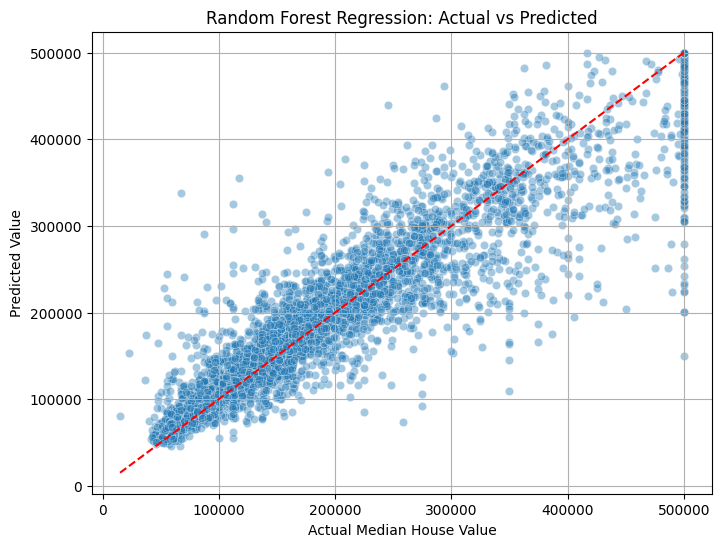

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
rf_preds = rf.predict(X_test_scaled)

# Evaluation
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest Regression")
print(f"MSE: {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


### 🟣 Gradient Boosting Regression

This is an ensemble method that builds decision trees sequentially, with each tree focusing on correcting the errors of the previous ones.
It is powerful and often provides excellent performance, especially when there are complex relationships in the data.

### Use Cases:

Predicting Housing Prices

Stock Market Prediction

 Energy Consumption Forecasting

Gradient Boosting Regression
MSE: 3199579012.37
R² Score: 0.77


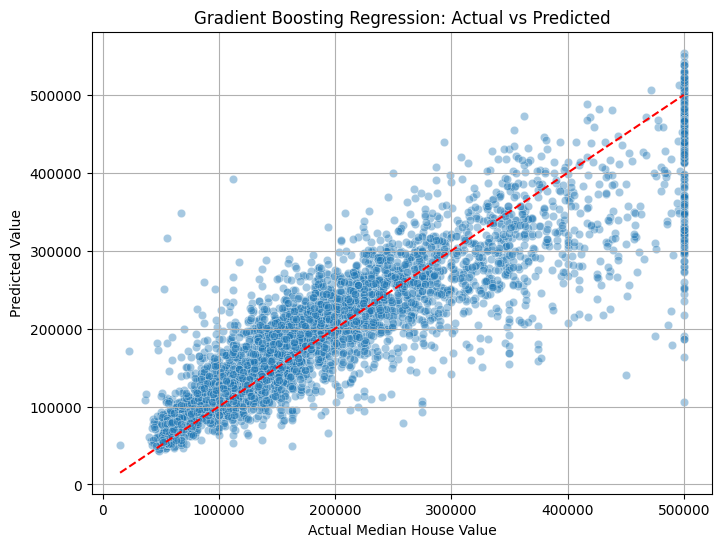

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_scaled, y_train)

# Predict
gbr_preds = gbr.predict(X_test_scaled)

# Evaluation
gbr_mse = mean_squared_error(y_test, gbr_preds)
gbr_r2 = r2_score(y_test, gbr_preds)

print("Gradient Boosting Regression")
print(f"MSE: {gbr_mse:.2f}")
print(f"R² Score: {gbr_r2:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=gbr_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Gradient Boosting Regression: Actual vs Predicted")
plt.grid(True)
plt.show()
